### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

In [47]:
# using Plots, Interpolations, Polynomials, LinearAlgebra,Statistics,DataFrames,Measures

## Zad 1

In [48]:
function Lagrange(x_vals,y_vals,x)
    P = 0
    len = size(x_vals)[1]
    
    for j in 1:len
        L = 1
        for i in 1:len
            if i != j
                L *= (x-x_vals[i])/(x_vals[j]-x_vals[i])
            end
        end
        P += (y_vals[j]*L)
    end
    return P
end


Lagrange (generic function with 1 method)

In [54]:
x_vals = 0:1:10
y_vals = [rand() for x in x_vals]
distrib = 0:0.01:10

0.0:0.01:10.0

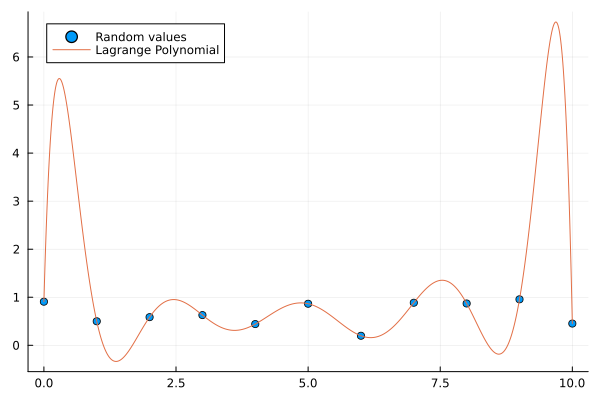

In [55]:
polynom = [Lagrange(x_vals,y_vals,x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,polynom,label="Lagrange Polynomial")

## Zad 2

In [ ]:
# x_vals = 0:1:10
# y_vals = [rand() for x in x_vals]
# distrib = 0:0.01:10

In [62]:
function NewtonInterpolation(x_vals)
    n = length(x_vals)
    d = zeros((n,n))
    for i=1:n
        for j=1:i-1
            d[i] = (d[j] - d[i])/(x_vals[j] - x_vals[i])
        end
    end
    return d
end

function NewtonForm(x_vals, d, x)
    n = length(d)
    result = d[n]
    for i=n-1:-1:1
        result = result*(x - x_vals[i]) + d[i]
    end
    return result
end

function Newton(x_vals, x)
    divided = NewtonInterpolation(x_vals,f)
    result = NewtonForm(x_vals,divided,x)
    return divided, result
end

Newton (generic function with 1 method)

In [63]:
table = NewtonInterpolation(x_vals,y_vals)
newton = [Newton(table,x_vals,x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,newton,label="Newton Polynomial")

LoadError: MethodError: no method matching Newton(::Vector{Float64}, ::StepRange{Int64, Int64}, ::Float64)
[0mClosest candidates are:
[0m  Newton(::Any, ::Any) at In[62]:21